Epoch 1/100
6222/6222 - 13s - loss: 0.0052 - 13s/epoch - 2ms/step
Epoch 2/100
6222/6222 - 10s - loss: 2.5232e-04 - 10s/epoch - 2ms/step
Epoch 3/100
6222/6222 - 11s - loss: 2.4993e-04 - 11s/epoch - 2ms/step
Epoch 4/100
6222/6222 - 11s - loss: 2.4553e-04 - 11s/epoch - 2ms/step
Epoch 5/100
6222/6222 - 11s - loss: 2.5048e-04 - 11s/epoch - 2ms/step
Epoch 6/100
6222/6222 - 11s - loss: 2.4616e-04 - 11s/epoch - 2ms/step
Epoch 7/100
6222/6222 - 11s - loss: 2.4711e-04 - 11s/epoch - 2ms/step
Epoch 8/100
6222/6222 - 11s - loss: 2.4869e-04 - 11s/epoch - 2ms/step
Epoch 9/100
6222/6222 - 10s - loss: 2.4581e-04 - 10s/epoch - 2ms/step
Epoch 10/100
6222/6222 - 10s - loss: 2.4988e-04 - 10s/epoch - 2ms/step
Epoch 11/100
6222/6222 - 11s - loss: 2.4939e-04 - 11s/epoch - 2ms/step
Epoch 12/100
6222/6222 - 11s - loss: 2.4828e-04 - 11s/epoch - 2ms/step
Epoch 13/100
6222/6222 - 11s - loss: 2.4663e-04 - 11s/epoch - 2ms/step
Epoch 14/100
6222/6222 - 11s - loss: 2.4912e-04 - 11s/epoch - 2ms/step
Epoch 15/100
6222/6

<ipython-input-5-66e0e66c69d1>:69: RuntimeWarning: invalid value encountered in multiply
  plt.plot(np.append(np.empty_like(trainPredict) * np.nan, testPredict))


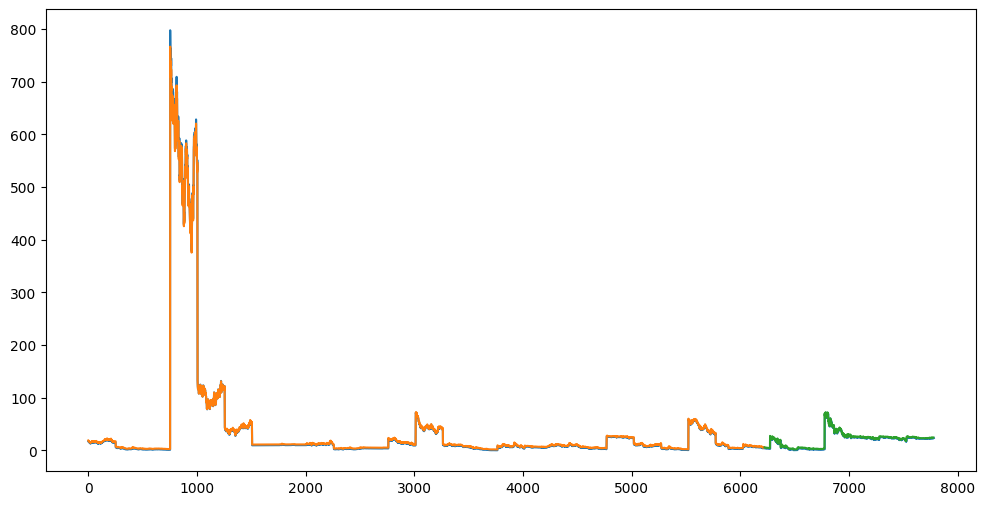

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Loading the data
data = pd.read_csv('/content/infolimpioavanzadoTarget.csv')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['close'] = scaler.fit_transform(data['close'].values.reshape(-1, 1))

# Prepare the data
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, shuffle=False)
train, test = train['close'].values, test['close'].values
train = train.reshape(-1, 1)
test = test.reshape(-1, 1)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions and targets to unscaled form
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(data['close'].values.reshape(-1,1)))
plt.plot(trainPredict)
plt.plot(np.append(np.empty_like(trainPredict) * np.nan, testPredict))
plt.show()
